<a href="https://colab.research.google.com/github/sakshisinghh28/GOT-Network-analysis-/blob/main/Got.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
book1 = pd.read_csv('/content/book1.csv')

#head of the dataset
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [4]:
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [6]:
# Creating a list of networks for all the books
books = []
book_fnames = ['/content/book1.csv', '/content/book2.csv', '/content/book3.csv', '/content/book4.csv', '/content/book5.csv']

for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, row in book.iterrows():
        source = row['Source']
        target = row['Target']
        relationship_type = row['Type']

        # Add edges (relationships)
        G_book.add_edge(source, target, relationship=relationship_type, weight=row['weight'])

    # Append the graph to the list
    books.append(G_book)

# Printing out the number of nodes and edges for the first book
print(f"Number of nodes in book 1: {books[0].number_of_nodes()}")
print(f"Number of edges in book 1: {books[0].number_of_edges()}")


Number of nodes in book 1: 187
Number of edges in book 1: 684


In [10]:
import networkx as nx

# Function to get top N characters by degree centrality
def get_top_characters_by_degree_centrality(graph, top_n=15):
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(graph)

    # Sort characters by degree centrality in descending order
    sorted_characters = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    # Get top N characters
    top_characters = sorted_characters[:top_n]

    return top_characters

# Top 15 characters in the first book
top_characters_book1 = get_top_characters_by_degree_centrality(books[0], top_n=15)
print("Top 15 characters in the first book by degree centrality:")
for character, centrality in top_characters_book1:
    print(f"{character}: {centrality}")

# Top 15 characters in the fifth book
top_characters_book5 = get_top_characters_by_degree_centrality(books[4], top_n=15)
print("\nTop 15 characters in the fifth book by degree centrality:")
for character, centrality in top_characters_book5:
    print(f"{character}: {centrality}")


Top 15 characters in the first book by degree centrality:
Eddard-Stark: 0.3548387096774194
Robert-Baratheon: 0.2688172043010753
Tyrion-Lannister: 0.24731182795698928
Catelyn-Stark: 0.23118279569892475
Jon-Snow: 0.19892473118279572
Robb-Stark: 0.18817204301075272
Sansa-Stark: 0.18817204301075272
Bran-Stark: 0.17204301075268819
Cersei-Lannister: 0.16129032258064518
Joffrey-Baratheon: 0.16129032258064518
Jaime-Lannister: 0.15591397849462366
Arya-Stark: 0.14516129032258066
Petyr-Baelish: 0.13978494623655915
Tywin-Lannister: 0.11827956989247312
Daenerys-Targaryen: 0.11290322580645162

Top 15 characters in the fifth book by degree centrality:
Jon-Snow: 0.1962025316455696
Daenerys-Targaryen: 0.18354430379746836
Stannis-Baratheon: 0.14873417721518986
Tyrion-Lannister: 0.10443037974683544
Theon-Greyjoy: 0.10443037974683544
Cersei-Lannister: 0.08860759493670886
Barristan-Selmy: 0.07911392405063292
Hizdahr-zo-Loraq: 0.06962025316455696
Asha-Greyjoy: 0.056962025316455694
Melisandre: 0.053797468354

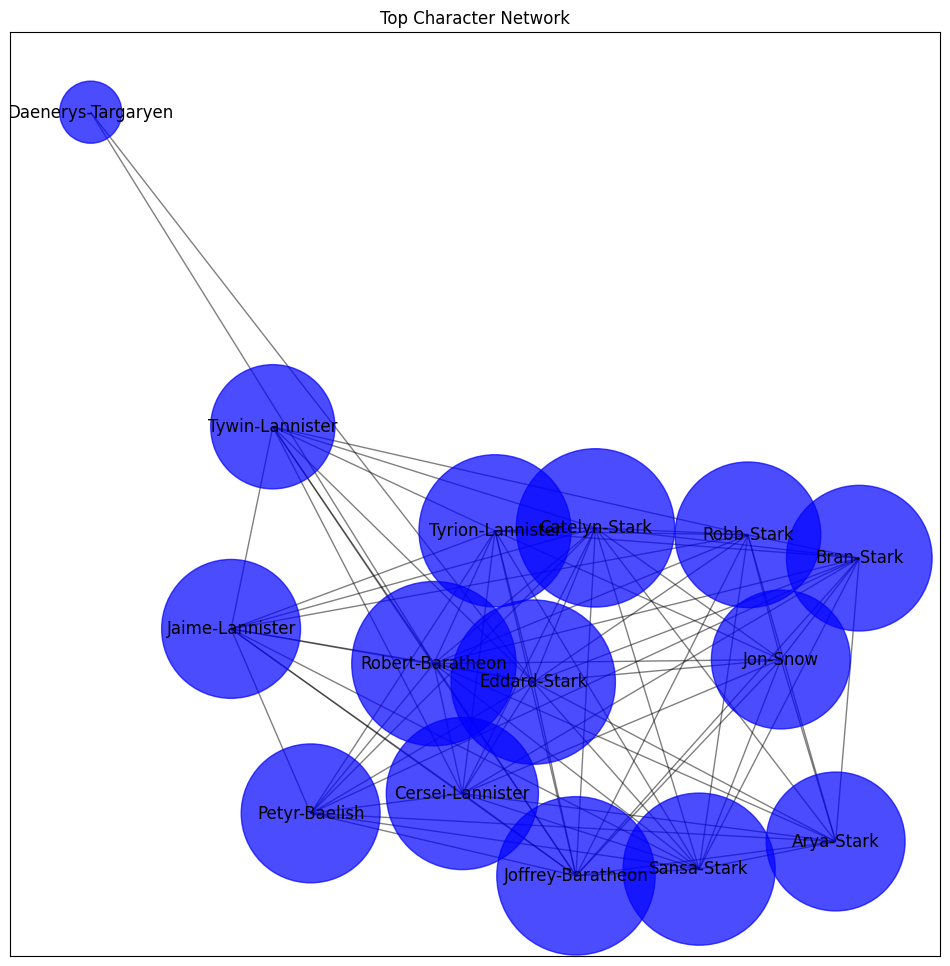

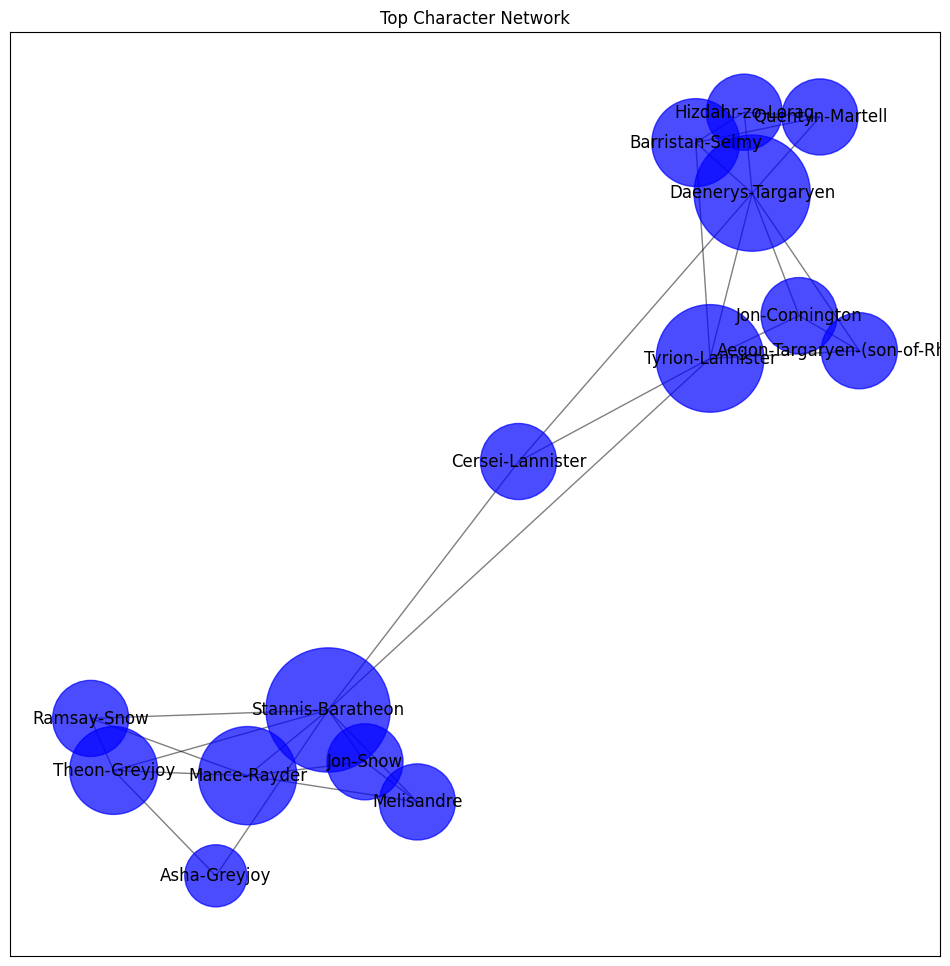

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network(graph, top_characters):
    # Create a subgraph with only the top characters and their direct connections
    top_nodes = [character for character, _ in top_characters]
    subgraph = graph.subgraph(top_nodes).copy()

    pos = nx.spring_layout(subgraph, seed=42)  # Fixed layout for reproducibility
    plt.figure(figsize=(12, 12))

    # Draw nodes with sizes proportional to their degree centrality
    node_sizes = [1000 * subgraph.degree(n) for n in subgraph.nodes()]
    nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.7)

    # Draw edges with transparency
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

    # Draw labels for the top characters
    nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')

    plt.title('Top Character Network')
    plt.show()

# Draw network for the first book
draw_network(books[0], top_characters_book1)

# Draw network for the fifth book
draw_network(books[4], top_characters_book5)
